# Movie Industry Analysis: What features affect the gross revenue of a movie?

## Introduction
Some movies make more money than others. Is it about the star or the director of the movie, the budget that was used or even the runtime? This analysis is to figure out what really decides the gross revenue of a movie. 

For this analysis [Movie Industry](https://www.kaggle.com/datasets/danielgrijalvas/movies) data set from [Kaggle](https://www.kaggle.com/) will be used. It contains 7512 movies, with information such as genre, year released, star, budget, gross and many more.


## Data wrangling and preparing the environment

In [35]:
#importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#matplotlib inline is used so the plots will be generated here, not in a seperate window.
%matplotlib inline
#adjusting the size of the future plots
matplotlib.rcParams['figure.figsize'] = (12, 8) 

#loading the data
df = pd.read_csv('movies.csv')

In [36]:
#checking the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


The data seems nicely organized, however missing and duplicate values should also be checked and dropped. Additionally some of the columns might need some data type changes. For example, columns votes, budget, gross and runtime should have data type "int64" instead of "float64". This is not a necessary change however the data will have a cleaner look. 

For some of the rows, year and released columns do not match, to fix this extracting the year from the released column is needed.

In [37]:
#checking for missing values
for col in df.columns:
    missing_percentage = np.mean(df[col].isnull())
    print(col, missing_percentage)

name 0.0
rating 0.010041731872717789
genre 0.0
year 0.0
released 0.0002608242044861763
score 0.0003912363067292645
votes 0.0003912363067292645
director 0.0
writer 0.0003912363067292645
star 0.00013041210224308815
country 0.0003912363067292645
budget 0.2831246739697444
gross 0.02464788732394366
company 0.002217005738132499
runtime 0.0005216484089723526


In [38]:
#dropping the missing values
df = df.dropna()
#dropping the duplicates
df = df.drop_duplicates()

In [41]:
#investigating the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [42]:
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [43]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [44]:
df['year_correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [45]:
df.drop(['released', 'country', 'company', 'rating', 'votes', 'year'], axis=1, inplace=True)

In [46]:
df.head()

,name,genre,score,director,writer,star,budget,gross,runtime,yearcorrect
0,The Shining,Drama,8.4,Stanley Kubrick,Stephen King,Jack Nicholson,19000000,46998772,146,1980
1,The Blue Lagoon,Adventure,5.8,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000,58853106,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,Action,8.7,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000,538375067,124,1980
3,Airplane!,Comedy,7.7,Jim Abrahams,Jim Abrahams,Robert Hays,3500000,83453539,88,1980
4,Caddyshack,Comedy,7.3,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000,39846344,98,1980


In [47]:
df.tail()

,name,genre,score,director,writer,star,budget,gross,runtime,yearcorrect
7648,Bad Boys for Life,Action,6.6,Adil El Arbi,Peter Craig,Will Smith,90000000,426505244,124,2020
7649,Sonic the Hedgehog,Action,6.5,Jeff Fowler,Pat Casey,Ben Schwartz,85000000,319715683,99,2020
7650,Dolittle,Adventure,5.6,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,175000000,245487753,101,2020
7651,The Call of the Wild,Adventure,6.8,Chris Sanders,Michael Green,Harrison Ford,135000000,111105497,100,2020
7652,The Eight Hundred,Action,6.8,Hu Guan,Hu Guan,Zhi-zhong Huang,80000000,461421559,149,2020


In [13]:
# df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [50]:
# pd.set_option('display.max_rows', None)

## Correlation check
Using the corr() function, it is easy to get a general idea of which numerical values affect each other the most. Default correlation type for corr() is Pearson correlation which measures the strength of the linear relationship between two variables. Pearson correlation coefficient has a value between -1 to 1; 0 meaning no correlation, -1 and 1 being negative and positive linear correlation respectively. 

In [51]:
df.corr() #default is pearson

,score,budget,gross,runtime,yearcorrect
score,1.000000,0.072001,0.222556,0.414068,0.061923
budget,0.072001,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.061923,0.320312,0.268721,0.075294,1.000000


For a better visualization, seaborn heatmap is used.

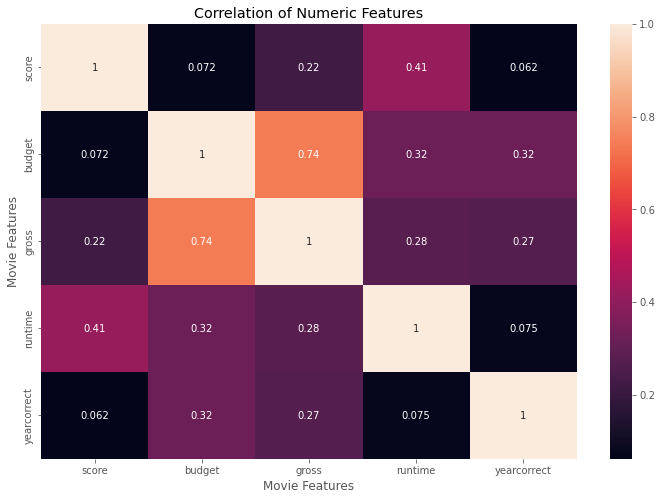

In [52]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation of Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

According to the heat map above, only significant correlation is between budget and gross revenue. Based on this, for further analysis a scatter plot of budget vs gross revenue is created below.

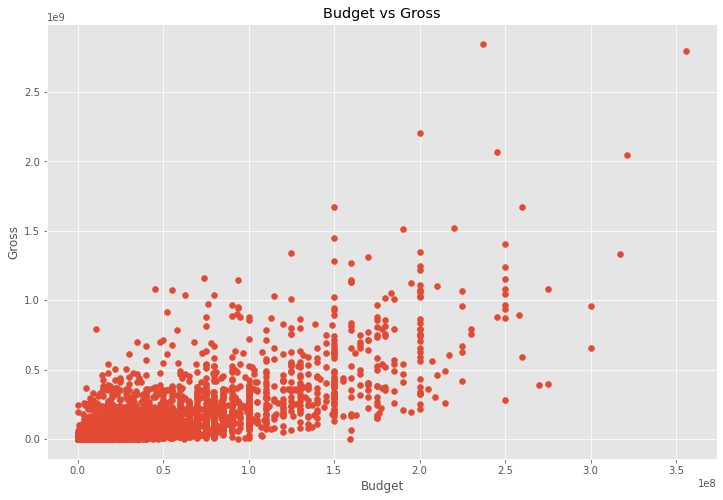

In [48]:
#scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

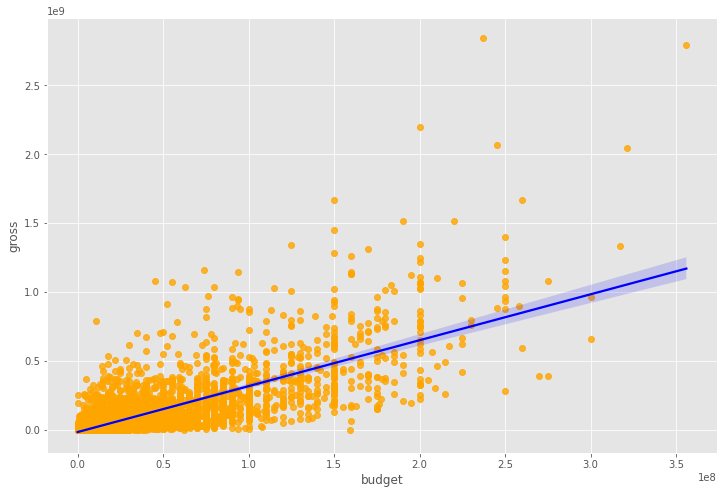

In [ ]:
#Using seaborn, a regression line will be created.

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'orange'}, line_kws={'color':'blue'})

According to the figure above, there is a clear relation between budget and gross revenue of a movie. So **a higher budget does equal to a higher gross revenue**. However, it is good to note that profit is not considered at this point in the analysis. 